<a href="https://colab.research.google.com/github/LilianeEff/Random-Projects/blob/main/Graphs_for_econ430_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

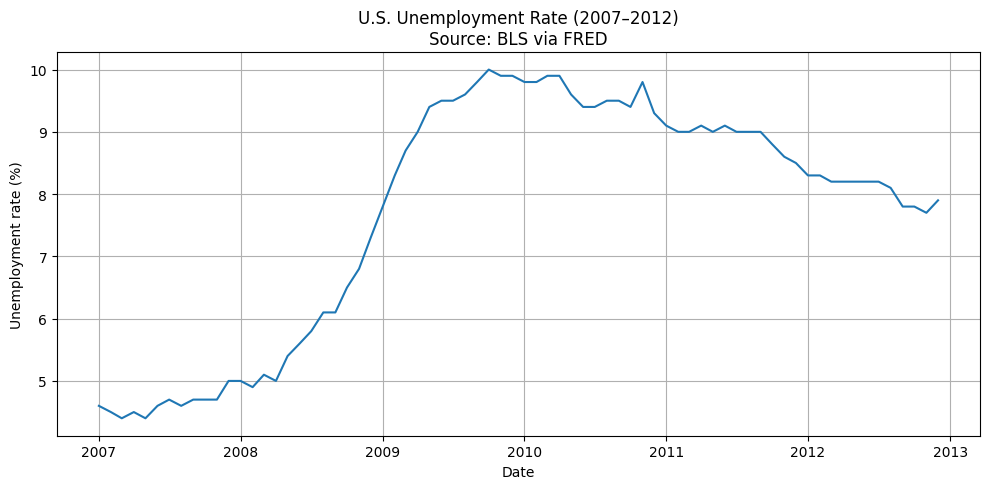

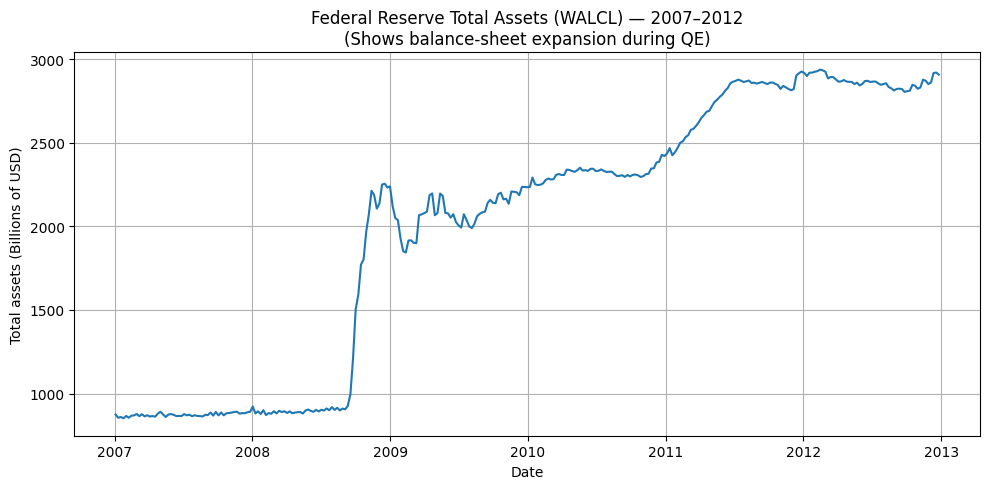

/tmp/ipython-input-2296196058.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  walcl_monthly = walcl["TotalAssets_Bil"].resample("M").mean()


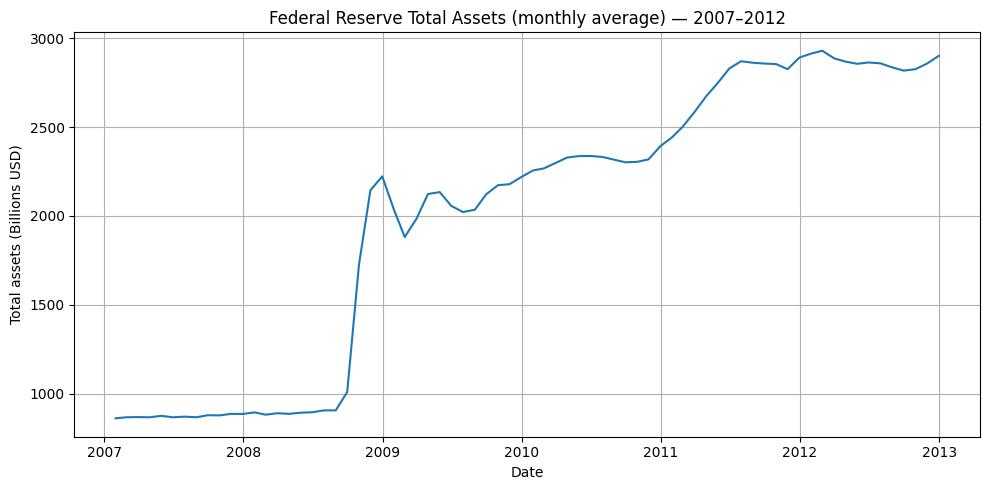

In [3]:
# Save as plot_qe_unrate_2007_2012.py or run in a Jupyter cell
import pandas as pd
import matplotlib.pyplot as plt

# 1) URLs (FRED CSV endpoints)
url_unrate = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE"
url_walcl  = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=WALCL"

# 2) Read series
unrate = pd.read_csv(url_unrate, parse_dates=["DATE"], index_col="DATE")
walcl  = pd.read_csv(url_walcl, parse_dates=["DATE"], index_col="DATE")

# 3) Filter to 2007-01-01 through 2012-12-31
start = "2007-01-01"
end   = "2012-12-31"
unrate = unrate.loc[start:end].rename(columns={"UNRATE":"UnemploymentRate"})
walcl  = walcl.loc[start:end].rename(columns={"WALCL":"TotalAssets_Millions"})

# 4) Prepare WALCL for plotting: convert from millions to billions for easier y-axis reading
walcl["TotalAssets_Bil"] = walcl["TotalAssets_Millions"] / 1000.0

# 5) Graph 1: U.S. unemployment rate 2007–2012 (monthly)
plt.figure(figsize=(10,5))
plt.plot(unrate.index, unrate["UnemploymentRate"])
plt.title("U.S. Unemployment Rate (2007–2012)\nSource: BLS via FRED")
plt.xlabel("Date")
plt.ylabel("Unemployment rate (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("graph_unemployment_2007_2012.png", dpi=300)
plt.show()

# 6) Graph 2: Fed balance sheet expansion during QE (weekly series displayed)
plt.figure(figsize=(10,5))
plt.plot(walcl.index, walcl["TotalAssets_Bil"])
plt.title("Federal Reserve Total Assets (WALCL) — 2007–2012\n(Shows balance-sheet expansion during QE)")
plt.xlabel("Date")
plt.ylabel("Total assets (Billions of USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("graph_fed_balance_sheet_2007_2012.png", dpi=300)
plt.show()

# 7) Optional: if you'd rather see monthly-aggregated (smoother) WALCL:
walcl_monthly = walcl["TotalAssets_Bil"].resample("M").mean()
plt.figure(figsize=(10,5))
plt.plot(walcl_monthly.index, walcl_monthly)
plt.title("Federal Reserve Total Assets (monthly average) — 2007–2012")
plt.xlabel("Date")
plt.ylabel("Total assets (Billions USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("graph_fed_balance_sheet_monthly_2007_2012.png", dpi=300)
plt.show()


In [2]:
import requests

url_unrate = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE"
url_walcl  = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=WALCL"

response_unrate = requests.get(url_unrate)
response_walcl = requests.get(url_walcl)

print("UNRATE CSV head:")
print(response_unrate.text.splitlines()[:5])

print("\nWALCL CSV head:")
print(response_walcl.text.splitlines()[:5])

UNRATE CSV head:
['observation_date,UNRATE', '1948-01-01,3.4', '1948-02-01,3.8', '1948-03-01,4.0', '1948-04-01,3.9']

WALCL CSV head:
['observation_date,WALCL', '2002-12-18,719542', '2002-12-25,732059', '2003-01-01,730994', '2003-01-08,723762']


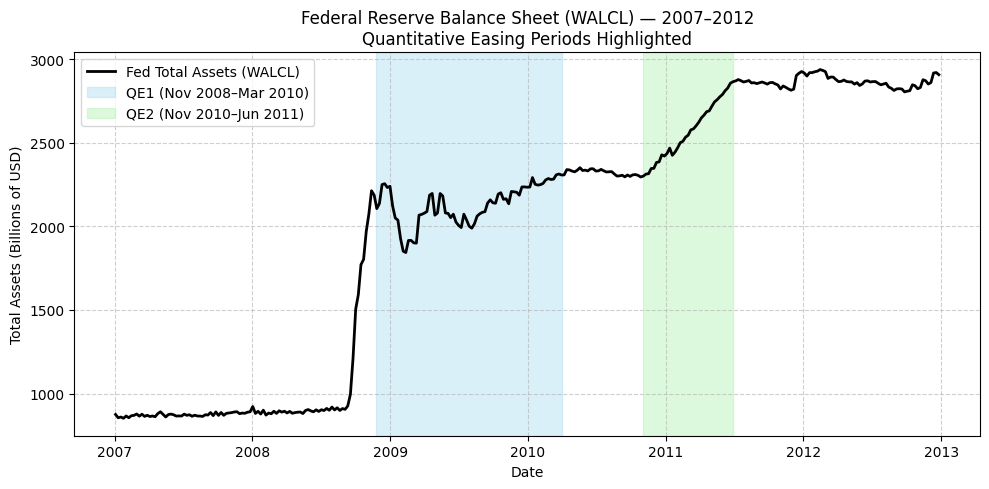

In [6]:
# --- Federal Reserve Balance Sheet: QE Visualization ---
# Data source: FRED (Federal Reserve Bank of St. Louis)
# Series: WALCL - Total Assets of the Federal Reserve

import pandas as pd
import matplotlib.pyplot as plt

# Load data directly from FRED (official source)
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=WALCL"
walcl = pd.read_csv(url, parse_dates=["observation_date"], index_col="observation_date")

# Filter to 2007–2012
walcl = walcl.loc["2007-01-01":"2012-12-31"]
walcl.rename(columns={"WALCL": "TotalAssets_Millions"}, inplace=True)
walcl["TotalAssets_Billions"] = walcl["TotalAssets_Millions"] / 1000

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(walcl.index, walcl["TotalAssets_Billions"], color="black", lw=2, label="Fed Total Assets (WALCL)")

# QE1 period: Nov 25, 2008 – Mar 31, 2010
plt.axvspan("2008-11-25", "2010-03-31", color="skyblue", alpha=0.3, label="QE1 (Nov 2008–Mar 2010)")

# QE2 period: Nov 3, 2010 – Jun 30, 2011
plt.axvspan("2010-11-03", "2011-06-30", color="lightgreen", alpha=0.3, label="QE2 (Nov 2010–Jun 2011)")

plt.title("Federal Reserve Balance Sheet (WALCL) — 2007–2012\nQuantitative Easing Periods Highlighted")
plt.xlabel("Date")
plt.ylabel("Total Assets (Billions of USD)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the chart
plt.savefig("fed_balance_sheet_QE_2007_2012.png", dpi=300)
plt.show()